In [1]:
import sys
sys.path.append('..')
import os
import shutil
import time
import numpy as np
import random
import matplotlib.pyplot as plt
import multiprocessing_logging

from download_audioset import download_random_subset_files, BALANCED_TRAIN_URL, init_console_logger

In [2]:
# Configurations
data_dir = 'test'
ffmpeg_path = '../bin/ffmpeg/ffmpeg'
num_videos = 25
random_seed = 192838475

In [3]:
init_console_logger(True)
multiprocessing_logging.install_mp_handler()

In [4]:
def get_file_sizes(top, exts=None):
    if exts is None:
        exts = []

    total_size = 0
    
    ext_sizes = {}
    for idx, ext in enumerate(exts):
        # Ensure extensions start with a period
        if ext[0] != '.':
            exts[idx] = '.' + ext
        ext_sizes[ext] = []
        
    exts = set(exts)
        
    for root, dirs, files in os.walk(top):
        for filename in files:
            path = os.path.join(root, filename)
            size = os.path.getsize(path)
            total_size += size
            
            ext = os.path.splitext(filename)[-1]
            if ext in exts:
                ext_sizes[ext].append(size)
    return total_size, ext_sizes

In [5]:
def examine_results(data_dir, exts, total_time):
    total_size, ext_sizes = get_file_sizes(data_dir, exts)
    for ext in exts:
        sizes = np.array(ext_sizes[ext]) / 1000000 # Convert to MB (MEGABytes)
        print(ext)
        print("==========================")
        print("Number of files:\t{}".format(sizes.size))
        print("Total size:\t\t{0:.2f} MB".format(np.sum(sizes)))
        mean = np.mean(sizes)
        print("Mean:\t\t\t{0:.2f} MB".format(mean))
        print("Median:\t\t\t{0:.2f} MB".format(np.median(sizes)))
        print("Std. Dev.:\t\t{0:.2f} MB".format(np.std(sizes)))
        print("")
        print("Estimated Size for 2.1MM Tracks:\t{0:.2f} TB".format(2100000 * mean/1000000))
        
        plt.figure()
        plt.hist(sizes)
        plt.title('Distribution of {} file sizes'.format(ext))
        plt.xlabel('File size (MB)')
        plt.ylabel('Frequency')
        plt.show()
        
    print("Total processing time:\t{0:.2f} sec".format(total_time))
    print("Processing time per video:\t{0:.2f} sec".format(total_time / sizes.size))

        

# Examine the distribution of file sizes per file type when video file is best quality containing audio

In [6]:
random.seed(random_seed)
t_start = time.time()
download_random_subset_files(BALANCED_TRAIN_URL, data_dir, ffmpeg_path, 4, max_videos=100, video_mode='bestvideoaudio')
t_vwa = time.time() - t_start

2017-09-29 16:19:33,417 - audiosetdl - INFO - Downloading subset file for "balanced_train_segments"
2017-09-29 16:19:33,738 - audiosetdl - INFO - Starting download jobs for random subset (of size 100) of subset "balanced_train_segments"
2017-09-29 16:19:33,826 - audiosetdl - INFO - Attempting to download video zTL9KyTtn64 (30.0 - 40.0)
2017-09-29 16:19:33,825 - audiosetdl - INFO - Reached maximum (100) for subset balanced_train_segments
2017-09-29 16:19:33,828 - audiosetdl - INFO - Attempting to download video BQ1JuiTKfAQ (30.0 - 40.0)
2017-09-29 16:19:33,836 - audiosetdl - INFO - Attempting to download video o8gUvhE-0kA (30.0 - 40.0)
2017-09-29 16:19:33,828 - audiosetdl - INFO - Attempting to download video L-O0eEnvQt8 (20.0 - 30.0)
2017-09-29 16:19:55,817 - audiosetdl - INFO - Downloaded video L-O0eEnvQt8 (20.0 - 30.0)
2017-09-29 16:19:55,827 - audiosetdl - INFO - Attempting to download video UL7tkfWe9Bc (90.0 - 100.0)
2017-09-29 16:20:00,021 - audiosetdl - INFO - Downloaded video UL

2017-09-29 16:21:36,468 - audiosetdl - INFO - Downloaded video mYuaLETWuHo (10.0 - 20.0)
2017-09-29 16:21:36,476 - audiosetdl - INFO - Attempting to download video dgi9F2qT5KA (180.0 - 190.0)
2017-09-29 16:21:42,056 - audiosetdl - INFO - Downloaded video dgi9F2qT5KA (180.0 - 190.0)
2017-09-29 16:21:42,058 - audiosetdl - INFO - Attempting to download video cex_imP_XFs (10.0 - 20.0)
2017-09-29 16:21:50,402 - audiosetdl - INFO - Downloaded video cex_imP_XFs (10.0 - 20.0)
2017-09-29 16:21:50,408 - audiosetdl - INFO - Attempting to download video JO_G1plPrao (40.0 - 50.0)
2017-09-29 16:21:51,719 - audiosetdl - INFO - Downloaded video sphN-VDal2g (10.0 - 20.0)
2017-09-29 16:21:51,733 - audiosetdl - INFO - Attempting to download video n2g-33m8YRw (30.0 - 40.0)
2017-09-29 16:22:05,654 - audiosetdl - INFO - Downloaded video JO_G1plPrao (40.0 - 50.0)
2017-09-29 16:22:05,665 - audiosetdl - INFO - Attempting to download video 68HVZzEravA (30.0 - 40.0)
2017-09-29 16:22:06,825 - audiosetdl - INFO - 

2017-09-29 16:26:09,373 - audiosetdl - INFO - Downloaded video 5fraQQFOyWQ (30.0 - 40.0)
2017-09-29 16:26:09,377 - audiosetdl - INFO - Attempting to download video Ao9pQPwLNHA (30.0 - 40.0)
2017-09-29 16:26:09,560 - audiosetdl - INFO - Downloaded video fDBzeSQoTu8 (120.0 - 130.0)
2017-09-29 16:26:09,573 - audiosetdl - INFO - Attempting to download video OBJM1TqPvu4 (470.0 - 480.0)
2017-09-29 16:26:11,807 - audiosetdl - INFO - Downloaded video WhI_e7hH99w (120.0 - 130.0)
2017-09-29 16:26:11,820 - audiosetdl - INFO - Attempting to download video Yfr3NlwLenM (20.0 - 30.0)
2017-09-29 16:26:13,561 - audiosetdl - INFO - Downloaded video Ao9pQPwLNHA (30.0 - 40.0)
2017-09-29 16:26:13,570 - audiosetdl - INFO - Attempting to download video zTda7wonrBg (80.0 - 90.0)
2017-09-29 16:26:16,323 - audiosetdl - INFO - Downloaded video rNxj6t7ocQc (160.0 - 170.0)
2017-09-29 16:26:16,338 - audiosetdl - INFO - Attempting to download video wdNqMwBbv-k (11.0 - 21.0)
2017-09-29 16:26:17,268 - audiosetdl - INF

  File "../download_audioset.py", line 304, in download_yt_video
    input_args=video_input_args, output_args=video_output_args)
  File "../download_audioset.py", line 354, in segment_mp_worker
    download_yt_video(ytid, ts_start, ts_end, data_dir, ffmpeg_path, **ffmpeg_cfg)
  File "../download_audioset.py", line 178, in run_command
    stdout, stderr = proc.communicate()
  File "../download_audioset.py", line 216, in ffmpeg
    run_command(args)
  File "../download_audioset.py", line 216, in ffmpeg
    run_command(args)
  File "../download_audioset.py", line 178, in run_command
    stdout, stderr = proc.communicate()
  File "/home/jsondotload/projects/research/marl/sonyc/audiosetdl/bin/miniconda/lib/python3.6/subprocess.py", line 836, in communicate
    stdout, stderr = self._communicate(input, endtime, timeout)
  File "../download_audioset.py", line 178, in run_command
    stdout, stderr = proc.communicate()
  File "/home/jsondotload/projects/research/marl/sonyc/audiosetdl/bin/minic

NameError: name 'exit' is not defined

.mp4
Number of files:	98
Total size:		124.36 MB
Mean:			1.27 MB
Median:			0.96 MB
Std. Dev.:		1.10 MB

Estimated Size for 2.1MM Tracks:	2.66 TB


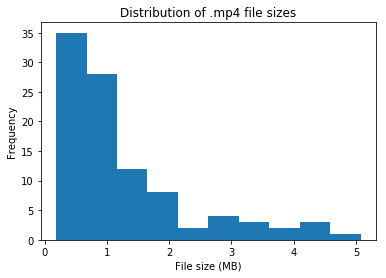

.flac
Number of files:	98
Total size:		67.32 MB
Mean:			0.69 MB
Median:			0.66 MB
Std. Dev.:		0.30 MB

Estimated Size for 2.1MM Tracks:	1.44 TB


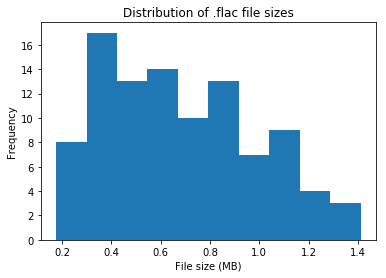

Total processing time:	403.30 sec
Processing time per video:	4.12 sec


In [11]:
examine_results(data_dir, ['.mp4', '.flac'], t_vwa)

In [10]:
shutil.rmtree(data_dir)

# Examine the distribution of file sizes per file type when audio is NOT included in the video files

In [11]:
random.seed(random_seed)
t_start = time.time()
download_random_subset_files(BALANCED_TRAIN_URL, data_dir, ffmpeg_path, 4, max_videos=100, video_mode='bestvideo')
t_vwoa = time.time() - t_start

2017-09-29 15:50:53,429 - audiosetdl - INFO - Downloading subset file for "balanced_train_segments"
2017-09-29 15:50:53,642 - audiosetdl - INFO - Starting download jobs for random subset (of size 100) of subset "balanced_train_segments"
2017-09-29 15:50:53,706 - audiosetdl - INFO - Reached maximum (100) for subset balanced_train_segments
2017-09-29 15:50:53,707 - audiosetdl - INFO - Attempting to download video BQ1JuiTKfAQ (30.0 - 40.0)
2017-09-29 15:50:53,707 - audiosetdl - INFO - Attempting to download video zTL9KyTtn64 (30.0 - 40.0)
2017-09-29 15:50:53,710 - audiosetdl - INFO - Attempting to download video o8gUvhE-0kA (30.0 - 40.0)
2017-09-29 15:50:53,709 - audiosetdl - INFO - Attempting to download video L-O0eEnvQt8 (20.0 - 30.0)
2017-09-29 15:51:18,574 - audiosetdl - INFO - Downloaded video L-O0eEnvQt8 (20.0 - 30.0)
2017-09-29 15:51:18,578 - audiosetdl - INFO - Attempting to download video UL7tkfWe9Bc (90.0 - 100.0)
2017-09-29 15:51:21,916 - audiosetdl - INFO - Downloaded video UL

2017-09-29 15:52:43,931 - audiosetdl - INFO - Downloaded video mYuaLETWuHo (10.0 - 20.0)
2017-09-29 15:52:43,937 - audiosetdl - INFO - Attempting to download video dgi9F2qT5KA (180.0 - 190.0)
2017-09-29 15:52:50,360 - audiosetdl - INFO - Downloaded video dgi9F2qT5KA (180.0 - 190.0)
2017-09-29 15:52:50,382 - audiosetdl - INFO - Attempting to download video cex_imP_XFs (10.0 - 20.0)
2017-09-29 15:52:58,630 - audiosetdl - INFO - Downloaded video cex_imP_XFs (10.0 - 20.0)
2017-09-29 15:52:58,636 - audiosetdl - INFO - Attempting to download video JO_G1plPrao (40.0 - 50.0)
2017-09-29 15:53:00,555 - audiosetdl - INFO - Downloaded video sphN-VDal2g (10.0 - 20.0)
2017-09-29 15:53:00,562 - audiosetdl - INFO - Attempting to download video n2g-33m8YRw (30.0 - 40.0)
2017-09-29 15:53:14,143 - audiosetdl - INFO - Downloaded video JO_G1plPrao (40.0 - 50.0)
2017-09-29 15:53:14,157 - audiosetdl - INFO - Attempting to download video 68HVZzEravA (30.0 - 40.0)
2017-09-29 15:53:19,506 - audiosetdl - INFO - 

2017-09-29 15:57:04,605 - audiosetdl - INFO - Downloaded video 5fraQQFOyWQ (30.0 - 40.0)
2017-09-29 15:57:04,613 - audiosetdl - INFO - Attempting to download video Ao9pQPwLNHA (30.0 - 40.0)
2017-09-29 15:57:06,000 - audiosetdl - INFO - Downloaded video fDBzeSQoTu8 (120.0 - 130.0)
2017-09-29 15:57:06,004 - audiosetdl - INFO - Attempting to download video OBJM1TqPvu4 (470.0 - 480.0)
2017-09-29 15:57:08,508 - audiosetdl - INFO - Downloaded video WhI_e7hH99w (120.0 - 130.0)
2017-09-29 15:57:08,516 - audiosetdl - INFO - Attempting to download video Yfr3NlwLenM (20.0 - 30.0)
2017-09-29 15:57:08,843 - audiosetdl - INFO - Downloaded video Ao9pQPwLNHA (30.0 - 40.0)
2017-09-29 15:57:08,849 - audiosetdl - INFO - Attempting to download video zTda7wonrBg (80.0 - 90.0)
2017-09-29 15:57:09,709 - audiosetdl - INFO - Downloaded video rNxj6t7ocQc (160.0 - 170.0)
2017-09-29 15:57:09,712 - audiosetdl - INFO - Attempting to download video wdNqMwBbv-k (11.0 - 21.0)
2017-09-29 15:57:11,578 - audiosetdl - INF

2017-09-29 15:59:23,652 - audiosetdl - INFO - Downloaded video J8xY1eaeu8Y (30.0 - 40.0)
2017-09-29 15:59:23,744 - audiosetdl - INFO - Finished download jobs for subset "balanced_train_segments"


.mp4
Number of files:	97
Total size:		156.47 MB
Mean:			1.61 MB
Median:			0.94 MB
Std. Dev.:		2.08 MB

Estimated Size for 2.1MM Tracks:	3.39 TB


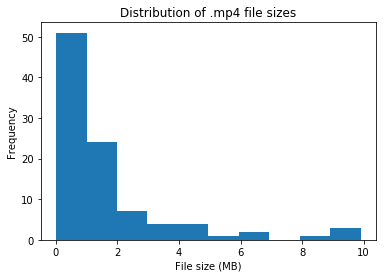

.flac
Number of files:	98
Total size:		67.32 MB
Mean:			0.69 MB
Median:			0.66 MB
Std. Dev.:		0.30 MB

Estimated Size for 2.1MM Tracks:	1.44 TB


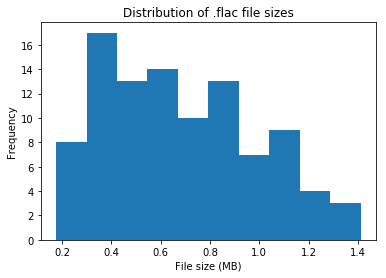

Total processing time:	553.55 sec
Processing time per video:	5.65 sec


In [10]:
examine_results(data_dir, ['.mp4', '.flac'], t_vwoa)

In [12]:
shutil.rmtree(data_dir)

# Examine the distribution of file sizes per file type when video file is best quality without audio, and merged with audio

In [ ]:
random.seed(random_seed)
t_start = time.time()
download_random_subset_files(BALANCED_TRAIN_URL, data_dir, ffmpeg_path, 4, max_videos=100, video_mode='bestvideowithaudio')
t_vam = time.time() - t_start

.mp4
Number of files:	97
Total size:		172.38 MB
Mean:			1.78 MB
Median:			1.06 MB
Std. Dev.:		2.08 MB

Estimated Size for 2.1MM Tracks:	3.73 TB


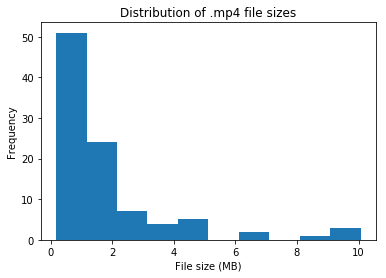

.flac
Number of files:	98
Total size:		67.32 MB
Mean:			0.69 MB
Median:			0.66 MB
Std. Dev.:		0.30 MB

Estimated Size for 2.1MM Tracks:	1.44 TB


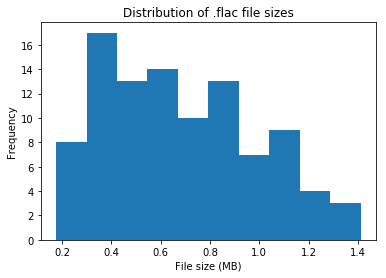

Total processing time:	1128.93 sec
Processing time per video:	11.52 sec


In [13]:
examine_results(data_dir, ['.mp4', '.flac'], t_vam)

In [ ]:
shutil.rmtree(data_dir)